In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re
import seaborn as sns
import duckdb

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
%cd /content/drive/My Drive/Data

/content/drive/My Drive/Data


In [2]:
SystemAnalyst = pd.read_csv("Data\SystemAnalyst.csv")
BusinessAnalyst = pd.read_csv("Data\BusinessAnalyst.csv")
Android =  pd.read_csv("Data\Android.csv")
IOS = pd.read_csv("Data\IOS.csv")
DevOps = pd.read_csv("Data\DevOps.csv")
Frontend = pd.read_csv("Data\Frontend.csv")
PythonDev = pd.read_csv("Data\PythonDev.csv")
ML = pd.read_csv("Data\ML.csv")
Product = pd.read_csv("Data\Product.csv")
Project = pd.read_csv("Data\Project.csv")

In [3]:
filtred_business_analyst = BusinessAnalyst[BusinessAnalyst['name'].str.contains(r'.?бизнес.аналитик.?', case=False)].reset_index(drop='True')
filtred_devops = DevOps[DevOps['name'].str.contains(r'.*\s*DevOps\s*[-_a-zA-Zа-яА-Я0-9]*',  case=False)]
filtred_frontend = Frontend[Frontend['name'].str.contains(r'.*\s*Frontend\s*[-_a-zA-Zа-яА-Я0-9]*', case=False)]
filtred_IOS = IOS[IOS['name'].str.contains(r'.*\s*IOS\s*[-_a-zA-Zа-яА-Я0-9]*', case=False)]
filtred_android = Android[Android['name'].str.contains(r'.*\s*Android\s*[-_a-zA-Zа-яА-Я0-9]*', case=False)]
filtred_ML = ML[ML['name'].str.contains(r'.*\s*(Machine Learning|ML|Data\s*Scientist|DS|AI)\s*[-_a-zA-Zа-яА-Я0-9]*', case=False)]
filtred_product = Product[Product['name'].str.contains(r'.*\s*(Product|продакт)\s*[-_a-zA-Zа-яА-Я0-9]*', case=False)]
filtred_project = Project[Project['name'].str.contains(r'.*\s*(Project|проджект)\s*[-_a-zA-Zа-яА-Я0-9]*', case=False)]
filtred_python = PythonDev[PythonDev['name'].str.contains(r'.*\s*(Python)\s*[-_a-zA-Zа-яА-Я0-9]*', case=False)]
filtred_system_analyst = SystemAnalyst[SystemAnalyst['name'].str.contains(r'.*\s*(System analyst|Системный аналитик)\s*[-_a-zA-Zа-яА-Я0-9]*', case=False)]


C:\Users\Антон\AppData\Local\Temp\ipykernel_32204\2056847646.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtred_ML = ML[ML['name'].str.contains(r'.*\s*(Machine Learning|ML|Data\s*Scientist|DS|AI)\s*[-_a-zA-Zа-яА-Я0-9]*', case=False)]
C:\Users\Антон\AppData\Local\Temp\ipykernel_32204\2056847646.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtred_product = Product[Product['name'].str.contains(r'.*\s*(Product|продакт)\s*[-_a-zA-Zа-яА-Я0-9]*', case=False)]
C:\Users\Антон\AppData\Local\Temp\ipykernel_32204\2056847646.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtred_project = Project[Project['name'].str.contains(r'.*\s*(Project|проджект)\s*[-_a-zA-Zа-яА-Я0-9]*', case=False)]
C:\Users\Антон\AppData\Loca

In [4]:
filtred_business_analyst['specialization'] = 'Business_analyst'
filtred_devops['specialization'] = 'Devops'
filtred_frontend['specialization'] = 'Frontend'
filtred_IOS['specialization'] = 'IOS'
filtred_android['specialization'] = 'Android'
filtred_ML['specialization'] = 'ML'
filtred_product['specialization'] = 'Product'
filtred_project['specialization'] = 'Project'
filtred_python['specialization'] = 'Python'
filtred_system_analyst['specialization'] = 'System_analyst'

C:\Users\Антон\AppData\Local\Temp\ipykernel_32204\1678128924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtred_devops['specialization'] = 'Devops'
C:\Users\Антон\AppData\Local\Temp\ipykernel_32204\1678128924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtred_frontend['specialization'] = 'Frontend'
C:\Users\Антон\AppData\Local\Temp\ipykernel_32204\1678128924.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [5]:
df = pd.concat([filtred_business_analyst, filtred_devops, filtred_frontend, filtred_IOS, filtred_android, filtred_ML, filtred_product, filtred_project, filtred_python, filtred_system_analyst])

In [6]:
df

,name,id,premium,alternate_url,created_at,department.name,employer.name,area.name,professional_roles.name,employment.name,...,salary.currency,salary.gross,schedule.name,snippet.requirement,snippet.responsibility,working_time_modes.name,working_time_intervals.name,type.name,description.vacancy,specialization
0,Бизнес аналитик (intern),88510764,False,https://hh.ru/vacancy/88510764,2023-10-23T10:28:40+0300,NaN,Sibedge,Томск,Бизнес-аналитик,Стажировка,...,NaN,NaN,Полный день,Высшее техническое образование (можно неоконче...,"Аудит, разработка, моделирование и реинжинирин...",NaN,NaN,Открытая,Sibedge — международная IT-компания с 17-ти ле...,Business_analyst
1,Бизнес-аналитик в консалтинг,87840332,False,https://hh.ru/vacancy/87840332,2023-10-24T19:03:21+0300,NaN,Intelligent Analytics,Москва,Бизнес-аналитик,Полная занятость,...,NaN,NaN,Полный день,Сильные аналитические навыки. От 1 года релева...,"Глубинная аналитика, поиск информации, подгото...",NaN,NaN,Открытая,Intelligent analytics специализируется на оказ...,Business_analyst
2,Начинающий специалист по бизнес аналитике,88333712,False,https://hh.ru/vacancy/88333712,2023-10-18T11:38:23+0300,NaN,Тестоедов Игорь Дмитриевич,Москва,Другое,Полная занятость,...,RUR,False,Полный день,Что мы хотим видеть от кандидата: Нам интересн...,Работа с проектами внутри компании. Курировани...,NaN,NaN,Открытая,Обязанности: • Работа с проектами внутри компа...,Business_analyst
3,Бизнес-аналитик в компанию-разработчик ИТ-прод...,88387266,False,https://hh.ru/vacancy/88387266,2023-10-19T11:17:05+0300,NaN,Департамент Ф53,Москва,Бизнес-аналитик,Полная занятость,...,RUR,False,Удаленная работа,"Опыт работы с БД, анализ данных, умение написа...",Подготовка детального описания существующей си...,NaN,NaN,Открытая,Бизнес-аналитик в компанию-разработчик собстве...,Business_analyst
4,Бизнес-аналитик,89047231,False,https://hh.ru/vacancy/89047231,2023-11-03T13:19:07+0300,NaN,Интеллектуальные решения,Москва,Аналитик,Полная занятость,...,RUR,True,Удаленная работа,Вам понадобятся: -Понимание процесса разработк...,Проработка бизнес-требований к разрабатываемым...,NaN,NaN,Открытая,О нас: Компания «Интеллектуальные решения» зан...,Business_analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,"Ведущий системный аналитик (проект ""Совкомбанк...",86966478,False,https://hh.ru/vacancy/86966478,2023-10-18T17:37:23+0300,NaN,Совкомбанк Технологии,Москва,Системный аналитик,Полная занятость,...,NaN,NaN,Полный день,"Опыт работы в IT проектах от 3-х лет, желатель...","Оценка всего портфеля в разрезе валют (доллар,...",NaN,NaN,Открытая,"ПРОЕКТ: ""Совкомбанк Инвестиции"" – это приложен...",System_analyst
1993,Бизнес-аналитик/Системный аналитик (проект вне...,87574605,False,https://hh.ru/vacancy/87574605,2023-10-27T08:44:32+0300,NaN,Уралэнерго,Казань,Бизнес-аналитик,Полная занятость,...,NaN,NaN,Полный день,Имеет сильные аналитические способности. Имеет...,Работу в надежной и стабильной компании участи...,NaN,NaN,Открытая,Уралэнерго - это 20 лет опыта работы на рынке ...,System_analyst
1995,Ведущий системный аналитик (телеком),86977028,False,https://hh.ru/vacancy/86977028,2023-10-25T13:02:47+0300,NaN,АйСи Сервис,Москва,Системный аналитик,Полная занятость,...,NaN,NaN,Удаленная работа,Опыт участия в продуктовой разработке в качест...,"Сбор и анализ потребностей заказчика, стейкхол...",NaN,NaN,Открытая,"АйСи Сервис – крупная компания, которая выступ...",System_analyst
1997,Системный аналитик (Middle/Middle+),88505269,False,https://hh.ru/vacancy/88505269,2023-10-23T09:39:35+0300,NaN,Центр Орбита,Москва,Системный аналитик,Полная занятость,...,NaN,NaN,Полный день,"Опыт работы с REST, Kafka/AMQ, Soap. Опыт рабо...",Активно развивать целевую архитектуру компании...,NaN,NaN,Открытая,ГК Орбита Мы масштабная технологическая группа...,System_analyst


In [7]:
df.describe()

,id,salary,salary.from,salary.to
count,5.568000e+03,0.0,1079.000000,807.000000
mean,8.739155e+07,NaN,121665.041705,185955.961586
std,3.289554e+06,NaN,74758.482201,115118.447636
min,3.044270e+07,NaN,40.000000,60.000000
25%,8.739278e+07,NaN,68000.000000,100000.000000
50%,8.839336e+07,NaN,100000.000000,170000.000000
75%,8.876723e+07,NaN,150000.000000,250000.000000
max,8.959208e+07,NaN,400000.000000,700000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5568 entries, 0 to 1998
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         5568 non-null   object 
 1   id                           5568 non-null   int64  
 2   premium                      5568 non-null   bool   
 3   alternate_url                5568 non-null   object 
 4   created_at                   5568 non-null   object 
 5   department.name              966 non-null    object 
 6   employer.name                5568 non-null   object 
 7   area.name                    5568 non-null   object 
 8   professional_roles.name      5568 non-null   object 
 9   employment.name              5568 non-null   object 
 10  experience.name              5568 non-null   object 
 11  salary                       0 non-null      float64
 12  salary.from                  1079 non-null   float64
 13  salary.to              

In [10]:
df['salary.from'] = df['salary.from'].fillna(df.groupby('specialization')['salary.from'].transform('mean'))
df['salary.to'] = df['salary.to'].fillna(df.groupby('specialization')['salary.to'].transform('mean'))
df['salary'] = df['salary'].fillna(df[['salary.from','salary.to']].mean(axis=1))
df['salary.currency'] = df['salary.currency'].fillna('RUR')

In [11]:
df.describe(include='object')

,name,alternate_url,created_at,department.name,employer.name,area.name,professional_roles.name,employment.name,experience.name,salary.currency,salary.gross,schedule.name,snippet.requirement,snippet.responsibility,working_time_modes.name,working_time_intervals.name,type.name,description.vacancy,specialization
count,5568,5568,5568,966,5568,5568,5568,5568,5568,5568,1325,5568,5529,5452,46,40,5568,5541,5568
unique,3021,5536,5256,134,1995,109,64,4,4,3,2,4,4732,4587,1,1,3,5078,10
top,Системный аналитик,https://hh.ru/vacancy/88425667,2023-11-14T09:36:13+0300,Сбер для экспертов,СБЕР,Москва,"Программист, разработчик",Полная занятость,От 3 до 6 лет,RUR,False,Полный день,Опыт разработки моделей машинного обучения с и...,Корпоративный портал с материалами для изучени...,Можно начинать работать после 16:00,Можно работать сменами по 4–6 часов в день,Открытая,Мы создаем и применяем AI-технологии для разви...,System_analyst
freq,556,4,7,168,313,3471,1738,5437,2770,5520,958,3944,19,23,46,40,5558,12,1251


In [95]:
df

,name,id,premium,alternate_url,created_at,department.name,employer.name,area.name,professional_roles.name,employment.name,...,salary.currency,salary.gross,schedule.name,snippet.requirement,snippet.responsibility,working_time_modes.name,working_time_intervals.name,type.name,description.vacancy,specialization
0,Бизнес аналитик (intern),88510764,False,https://hh.ru/vacancy/88510764,2023-10-23T10:28:40+0300,NaN,Sibedge,Томск,Бизнес-аналитик,Стажировка,...,RUR,NaN,Полный день,Высшее техническое образование (можно неоконче...,"Аудит, разработка, моделирование и реинжинирин...",NaN,NaN,Открытая,Sibedge — международная IT-компания с 17-ти ле...,Business_analyst
1,Бизнес-аналитик в консалтинг,87840332,False,https://hh.ru/vacancy/87840332,2023-10-24T19:03:21+0300,NaN,Intelligent Analytics,Москва,Бизнес-аналитик,Полная занятость,...,RUR,NaN,Полный день,Сильные аналитические навыки. От 1 года релева...,"Глубинная аналитика, поиск информации, подгото...",NaN,NaN,Открытая,Intelligent analytics специализируется на оказ...,Business_analyst
2,Начинающий специалист по бизнес аналитике,88333712,False,https://hh.ru/vacancy/88333712,2023-10-18T11:38:23+0300,NaN,Тестоедов Игорь Дмитриевич,Москва,Другое,Полная занятость,...,RUR,False,Полный день,Что мы хотим видеть от кандидата: Нам интересн...,Работа с проектами внутри компании. Курировани...,NaN,NaN,Открытая,Обязанности: • Работа с проектами внутри компа...,Business_analyst
3,Бизнес-аналитик в компанию-разработчик ИТ-прод...,88387266,False,https://hh.ru/vacancy/88387266,2023-10-19T11:17:05+0300,NaN,Департамент Ф53,Москва,Бизнес-аналитик,Полная занятость,...,RUR,False,Удаленная работа,"Опыт работы с БД, анализ данных, умение написа...",Подготовка детального описания существующей си...,NaN,NaN,Открытая,Бизнес-аналитик в компанию-разработчик собстве...,Business_analyst
4,Бизнес-аналитик,89047231,False,https://hh.ru/vacancy/89047231,2023-11-03T13:19:07+0300,NaN,Интеллектуальные решения,Москва,Аналитик,Полная занятость,...,RUR,True,Удаленная работа,Вам понадобятся: -Понимание процесса разработк...,Проработка бизнес-требований к разрабатываемым...,NaN,NaN,Открытая,О нас: Компания «Интеллектуальные решения» зан...,Business_analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,"Ведущий системный аналитик (проект ""Совкомбанк...",86966478,False,https://hh.ru/vacancy/86966478,2023-10-18T17:37:23+0300,NaN,Совкомбанк Технологии,Москва,Системный аналитик,Полная занятость,...,RUR,NaN,Полный день,"Опыт работы в IT проектах от 3-х лет, желатель...","Оценка всего портфеля в разрезе валют (доллар,...",NaN,NaN,Открытая,"ПРОЕКТ: ""Совкомбанк Инвестиции"" – это приложен...",System_analyst
1993,Бизнес-аналитик/Системный аналитик (проект вне...,87574605,False,https://hh.ru/vacancy/87574605,2023-10-27T08:44:32+0300,NaN,Уралэнерго,Казань,Бизнес-аналитик,Полная занятость,...,RUR,NaN,Полный день,Имеет сильные аналитические способности. Имеет...,Работу в надежной и стабильной компании участи...,NaN,NaN,Открытая,Уралэнерго - это 20 лет опыта работы на рынке ...,System_analyst
1995,Ведущий системный аналитик (телеком),86977028,False,https://hh.ru/vacancy/86977028,2023-10-25T13:02:47+0300,NaN,АйСи Сервис,Москва,Системный аналитик,Полная занятость,...,RUR,NaN,Удаленная работа,Опыт участия в продуктовой разработке в качест...,"Сбор и анализ потребностей заказчика, стейкхол...",NaN,NaN,Открытая,"АйСи Сервис – крупная компания, которая выступ...",System_analyst
1997,Системный аналитик (Middle/Middle+),88505269,False,https://hh.ru/vacancy/88505269,2023-10-23T09:39:35+0300,NaN,Центр Орбита,Москва,Системный аналитик,Полная занятость,...,RUR,NaN,Полный день,"Опыт работы с REST, Kafka/AMQ, Soap. Опыт рабо...",Активно развивать целевую архитектуру компании...,NaN,NaN,Открытая,ГК Орбита Мы масштабная технологическая группа...,System_analyst


In [13]:
df_cl = df.drop(['department.name', 'working_time_modes.name', 'working_time_intervals.name', 'salary.gross'], axis=1)
df_cl = df_cl.dropna()

In [14]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5399 entries, 0 to 1998
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     5399 non-null   object 
 1   id                       5399 non-null   int64  
 2   premium                  5399 non-null   bool   
 3   alternate_url            5399 non-null   object 
 4   created_at               5399 non-null   object 
 5   employer.name            5399 non-null   object 
 6   area.name                5399 non-null   object 
 7   professional_roles.name  5399 non-null   object 
 8   employment.name          5399 non-null   object 
 9   experience.name          5399 non-null   object 
 10  salary                   5399 non-null   float64
 11  salary.from              5399 non-null   float64
 12  salary.to                5399 non-null   float64
 13  salary.currency          5399 non-null   object 
 14  schedule.name            5399

In [15]:
# df_cl.salary = df_cl.
q = '''
SELECT specialization, "employer.name", AVG(CAST(salary AS FLOAT)) as avg_salary
FROM df_cl
GROUP BY specialization, "employer.name"
'''
spec_empl_avg_salary = duckdb.query(q).to_df()

In [16]:
len(spec_empl_avg_salary['specialization'].unique())

10

C:\Users\Антон\AppData\Local\Temp\ipykernel_32204\2880235223.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(mean_salary.index, rotation=90)


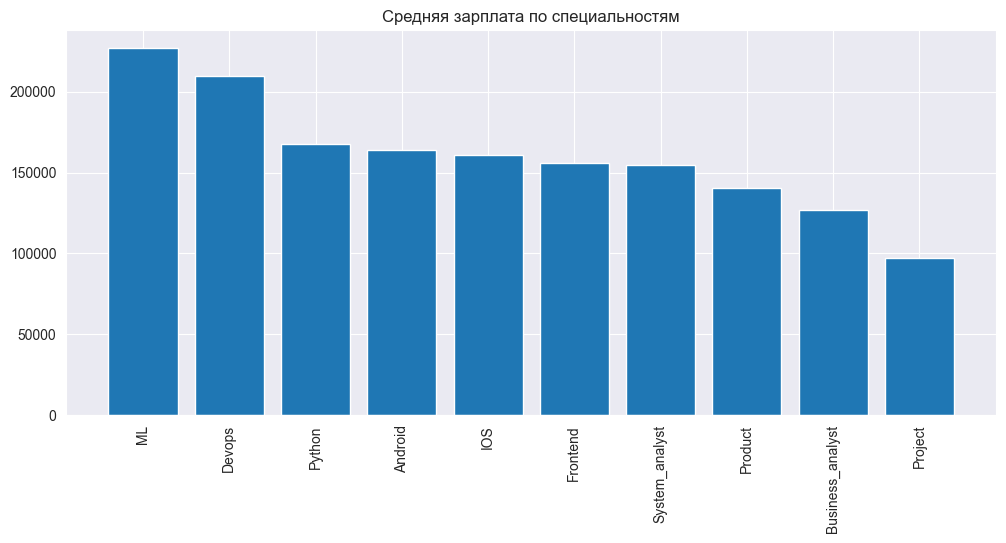

In [96]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
mean_salary = pd.DataFrame(df_cl.groupby('specialization')['salary'].mean())
mean_salary = mean_salary.sort_values(by='salary', ascending=False)
fig, axs = plt.subplots(figsize=(12, 5))
axs.bar(mean_salary.index, mean_salary.salary)
axs.set_xticklabels(mean_salary.index, rotation=90)
axs.set_title('Средняя зарплата по специальностям')
plt.show()

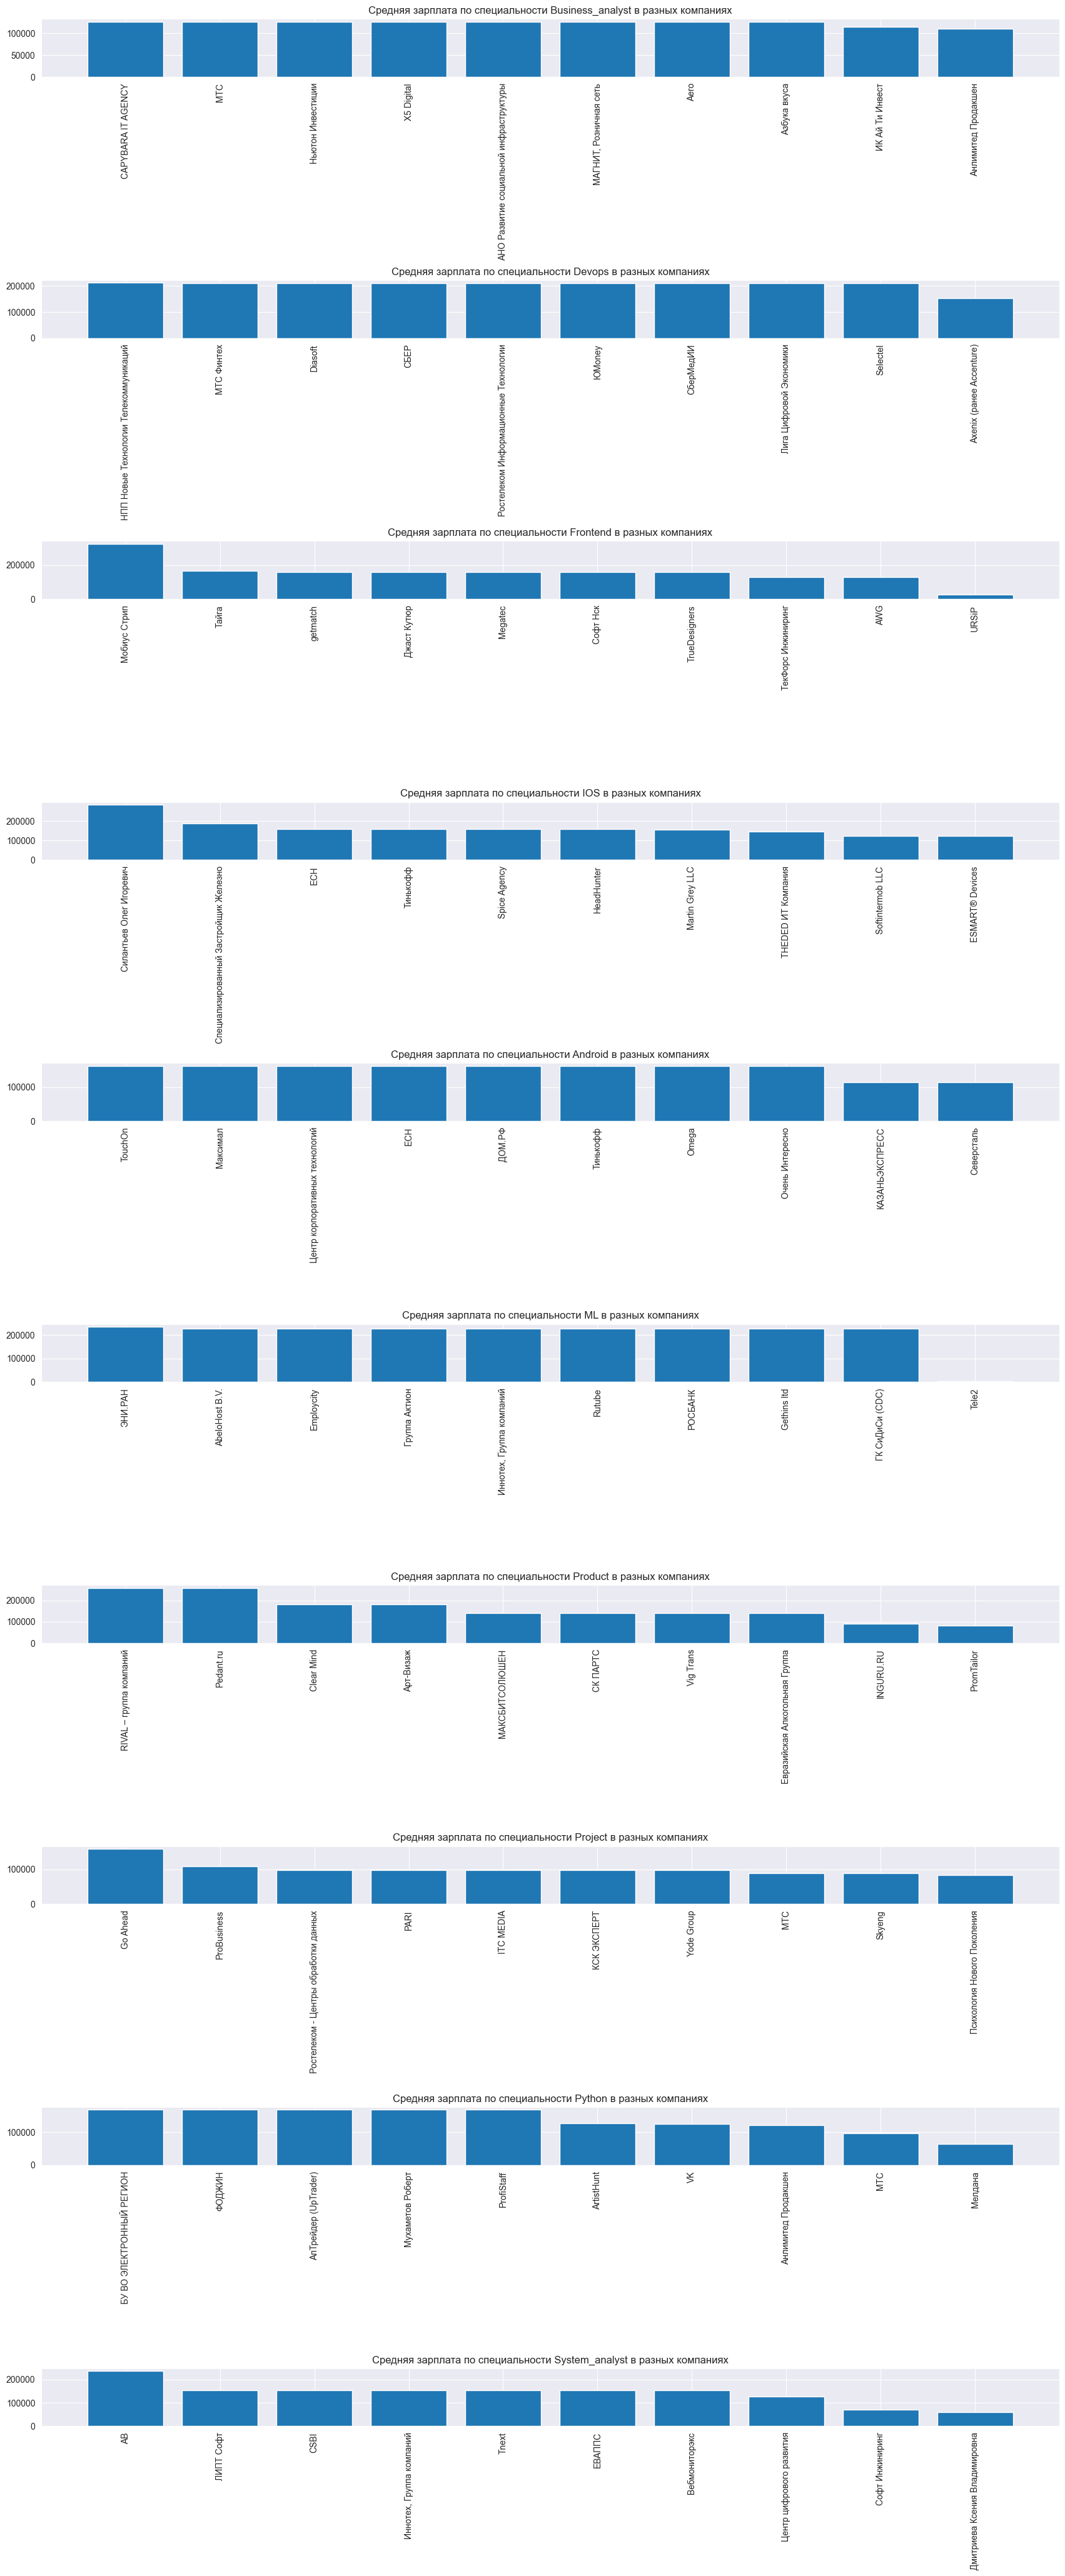

In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(spec_empl_avg_salary['specialization'].unique()), 1, figsize=(21,50))
axs = axs.flatten()

fig.subplots_adjust(hspace=3.5)

for i, spec in enumerate(spec_empl_avg_salary['specialization'].unique()):
    x = spec_empl_avg_salary[spec_empl_avg_salary['specialization'] == spec]['employer.name'][:10]
    y = spec_empl_avg_salary[spec_empl_avg_salary['specialization'] == spec]['avg_salary'][:10]
    y = y.sort_values(ascending=False)
    axs[i].bar(x, y)
    axs[i].set_xticks(range(len(x)))  # Set the x-axis ticks
    axs[i].set_xticklabels(x, rotation=90)  # Set the x-axis tick labels with rotation
    axs[i].set_title(f'Средняя зарплата по специальности {spec} в разных компаниях')
plt.show()


In [87]:
q = '''
SELECT specialization, "area.name", avg_salary
FROM 
(SELECT specialization, "area.name", AVG(CAST(salary AS FLOAT)) as avg_salary, ROW_NUMBER() over (PARTITION BY specialization order by avg_salary desc) as rank
FROM df_cl
GROUP BY specialization, "area.name"
ORDER BY avg_salary DESC)
where rank <=3

'''
s = duckdb.query(q).to_df()
s

,specialization,area.name,avg_salary
0,ML,Пенза,294310.812500
1,Python,Зеленоград,270000.000000
2,ML,Владивосток,256998.875000
3,ML,Екатеринбург,240016.410714
4,Python,Самара,227612.640625
5,Devops,Новосибирск,221061.683036
6,Devops,Волгоград,220000.000000
7,Devops,Казань,219750.968750
8,Business_analyst,Зеленоград,212500.000000
9,Python,Омск,210192.273438


Text(0.5, 1.0, 'График зависимости средней зарплаты от профессии и географии')

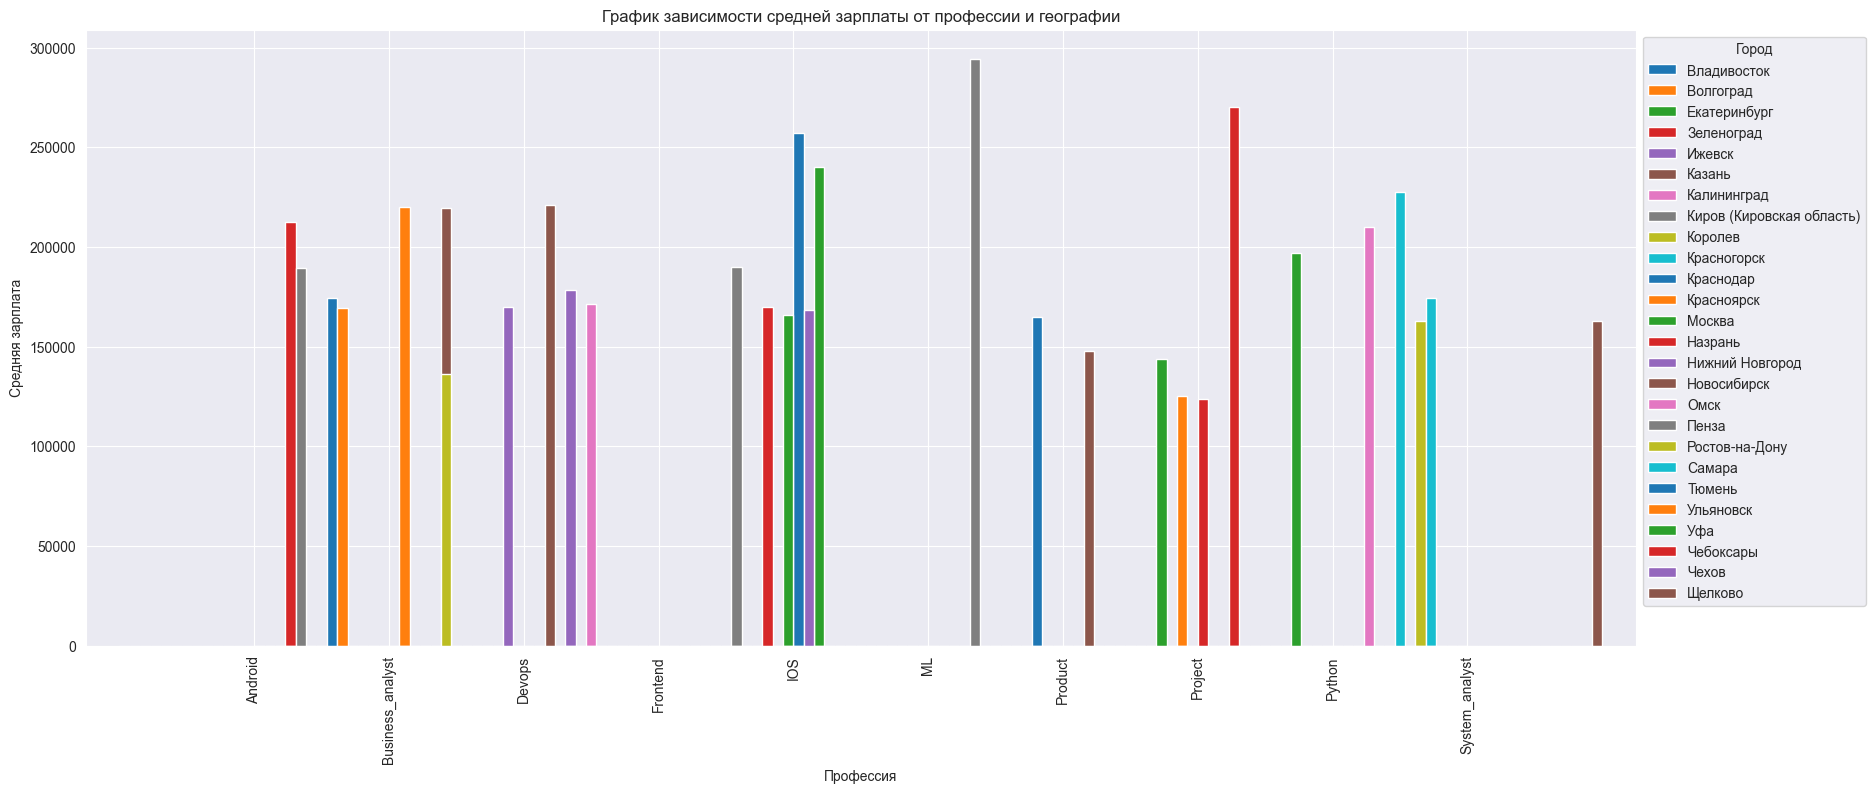

In [94]:
fig, ax = plt.subplots(figsize=(20, 8))
ax = s.pivot(index='specialization', columns='area.name', values='avg_salary').plot(kind='bar', ax=ax, width = 2.0)
ax.legend(title='Город', bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xlabel('Профессия')
ax.set_ylabel('Средняя зарплата')
ax.set_title('График зависимости средней зарплаты от профессии и географии')

In [89]:
q = '''
SELECT "employment.name",avg(salary)
FROM df_cl
GROUP BY "employment.name"
'''
data = duckdb.query(q).to_df()
data

,employment.name,avg(salary)
0,Полная занятость,160917.817725
1,Проектная работа,153793.790473
2,Стажировка,149295.939169
3,Частичная занятость,145514.613697


In [90]:
q = '''
SELECT specialization, "schedule.name" as schedule, avg(salary) as avg_salary
FROM df_cl
GROUP BY "schedule.name", specialization
ORDER BY specialization, avg_salary DESC
'''
schedule_avg_salary = duckdb.query(q).to_df()
schedule_avg_salary

,specialization,schedule,avg_salary
0,Android,Полный день,166605.357143
1,Android,Гибкий график,163776.388889
2,Android,Удаленная работа,158183.304989
3,Business_analyst,Удаленная работа,128617.660006
4,Business_analyst,Сменный график,126802.063001
5,Business_analyst,Гибкий график,126802.063001
6,Business_analyst,Полный день,126468.877164
7,Devops,Гибкий график,219678.787879
8,Devops,Удаленная работа,213252.716823
9,Devops,Полный день,207258.521274


In [91]:
cod_spec = pd.DataFrame(pd.factorize(schedule_avg_salary['specialization'])).T
cod_spec.columns = ['key_spec', 'specialization1']
cod_spec['key_spec'] = cod_spec['key_spec'].astype('int64')
data = cod_spec.join(schedule_avg_salary, lsuffix='_left', rsuffix='_right')
data  = data.drop('specialization1', axis=1)
data1 = data.sort_values(by=['schedule','avg_salary'], ascending=[False,False])
data1


,key_spec,specialization,schedule,avg_salary
16,5,ML,Удаленная работа,227930.168571
8,2,Devops,Удаленная работа,213252.716823
27,8,Python,Удаленная работа,163472.042500
14,4,IOS,Удаленная работа,162357.614904
2,0,Android,Удаленная работа,158183.304989
10,3,Frontend,Удаленная работа,157904.033421
29,9,System_analyst,Удаленная работа,157508.010679
20,6,Product,Удаленная работа,146208.837110
3,1,Business_analyst,Удаленная работа,128617.660006
25,7,Project,Удаленная работа,92498.300710


Text(0.5, 1.0, 'График зависимости средней зарплаты от профессии и графика работы')

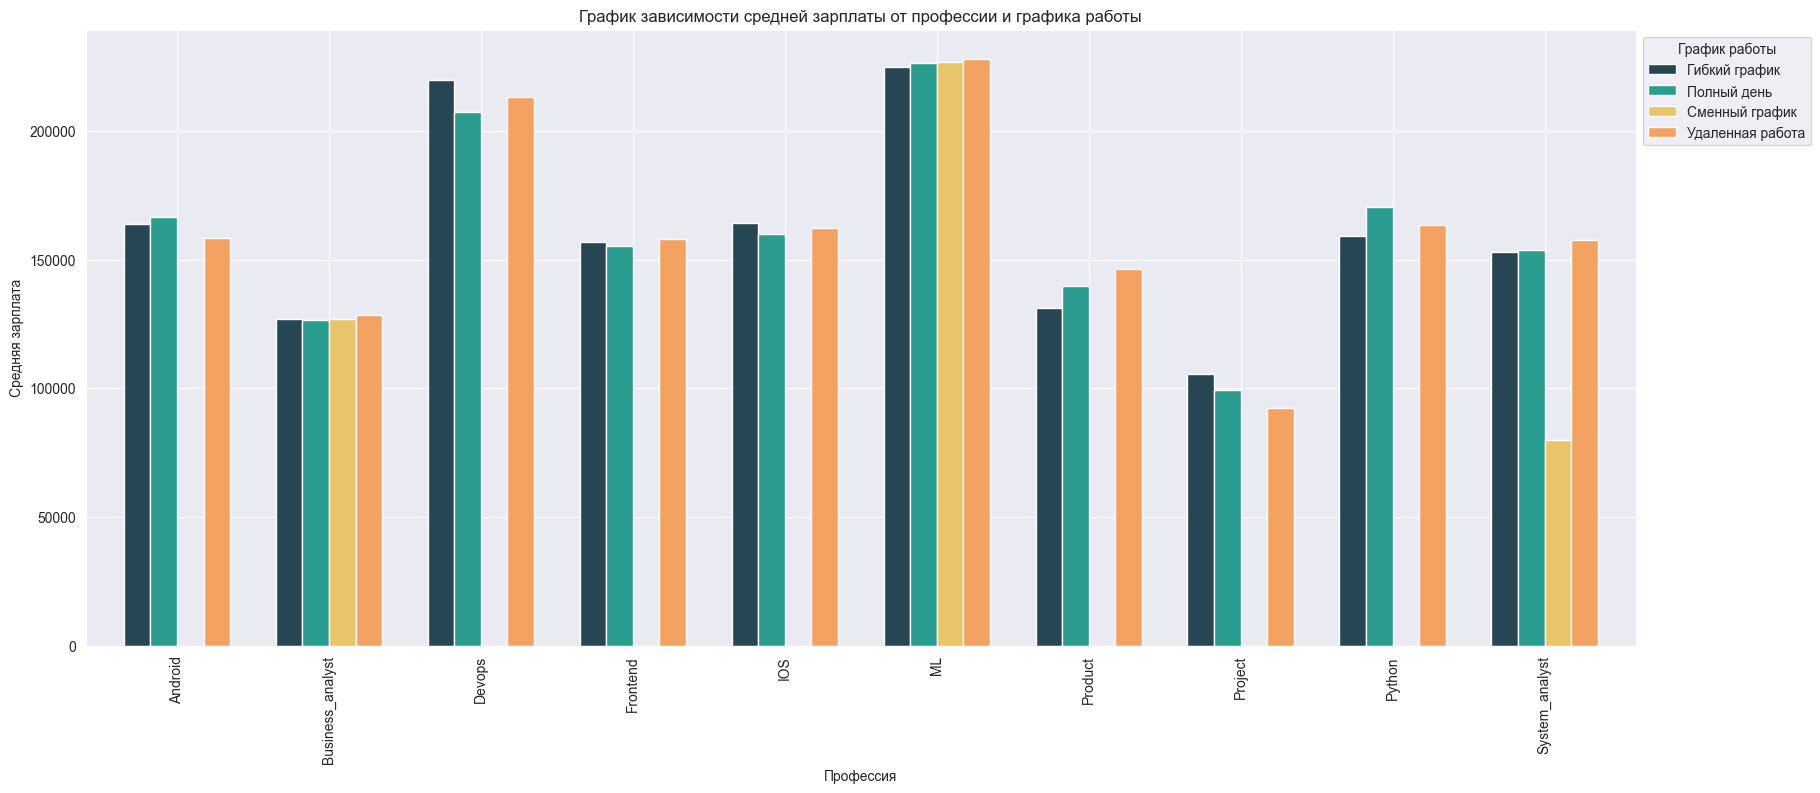

In [93]:
fig, ax = plt.subplots(figsize=(20, 8))
ax = data1.pivot(index = 'specialization', columns = 'schedule', values = 'avg_salary').plot(kind='bar', ax=ax, color = ['#264653','#2a9d8f','#e9c46a','#f4a261','#e76f51'], width = 0.7)
ax.legend(title='График работы', bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xlabel('Профессия')
ax.set_ylabel('Средняя зарплата')
ax.set_title('График зависимости средней зарплаты от профессии и графика работы')